<a href="https://colab.research.google.com/github/hectororuga/AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



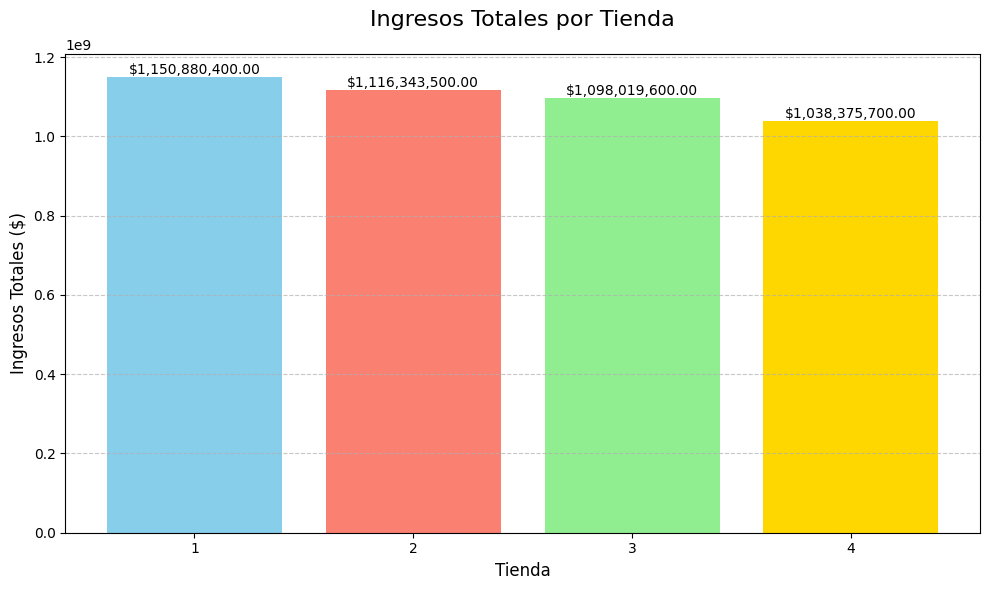

In [11]:
# Creación de DataFrames individuales para cada tienda y cálculo de ingresos totales
df_tienda1 = pd.DataFrame(tienda) # Convertir datos brutos a DataFrame estructurado
total_ingreso_t1 = df_tienda1['Precio'].sum() # Sumar todos los valores en columna 'Precio'

df_tienda2 = pd.DataFrame(tienda2)
total_ingreso_t2 = df_tienda2['Precio'].sum()

df_tienda3 = pd.DataFrame(tienda3)
total_ingreso_t3 = df_tienda3['Precio'].sum()

df_tienda4 = pd.DataFrame(tienda4)
total_ingreso_t4 = df_tienda4['Precio'].sum()

# Diccionario para organizar la información de todas las tiendas
ingresos_tiendas = {
    'Tienda': ['1', '2', '3', '4'],
    'Total Ingresos': [total_ingreso_t1, total_ingreso_t2, total_ingreso_t3, total_ingreso_t4]
}

# Creación del DataFrame final para análisis
df_ingresos_tiendas = pd.DataFrame(ingresos_tiendas)
df_ingresos_tiendas  # Mostrar el DataFrame resultante

import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
bars = plt.bar(df_ingresos_tiendas['Tienda'], df_ingresos_tiendas['Total Ingresos'],
               color=['skyblue', 'salmon', 'lightgreen', 'gold'])

# Personalizar el gráfico
plt.title('Ingresos Totales por Tienda', fontsize=16, pad=20)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingresos Totales ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir los valores en cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.2f}',
             ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

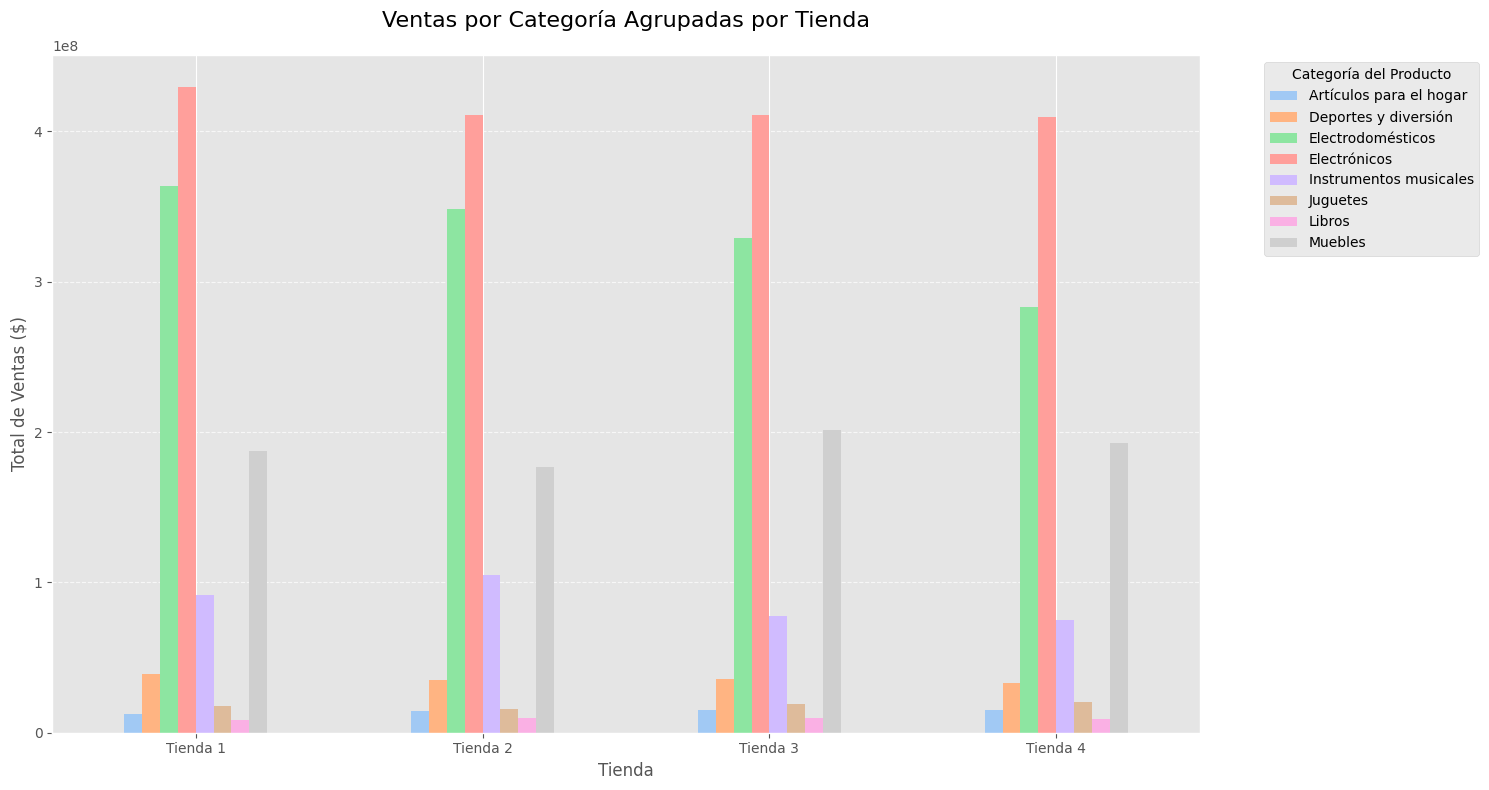

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
# Combina todos los dataframes en uno solo, agregando una columna para la tienda de origen
all_tiendas_con_tienda = pd.concat(
    [df_tienda1.assign(Tienda='Tienda 1'),
     df_tienda2.assign(Tienda='Tienda 2'),
     df_tienda3.assign(Tienda='Tienda 3'),
     df_tienda4.assign(Tienda='Tienda 4')],
    ignore_index=True
)

# Agrupa los datos por 'Tienda' y 'Categoría del Producto' y suma los precios
ventas_por_tienda_categoria = all_tiendas_con_tienda.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum().unstack(fill_value=0)

# Crea el gráfico de barras agrupadas
ventas_por_tienda_categoria.plot(kind='bar', figsize=(15, 8))

# Personaliza el gráfico
plt.title('Ventas por Categoría Agrupadas por Tienda', fontsize=16, pad=20)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Total de Ventas ($)', fontsize=12)
plt.xticks(rotation=0) # Mantener las etiquetas del eje X horizontales
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Categoría del Producto', bbox_to_anchor=(1.05, 1), loc='upper left') # Leyenda fuera del gráfico

# Muestra el gráfico
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


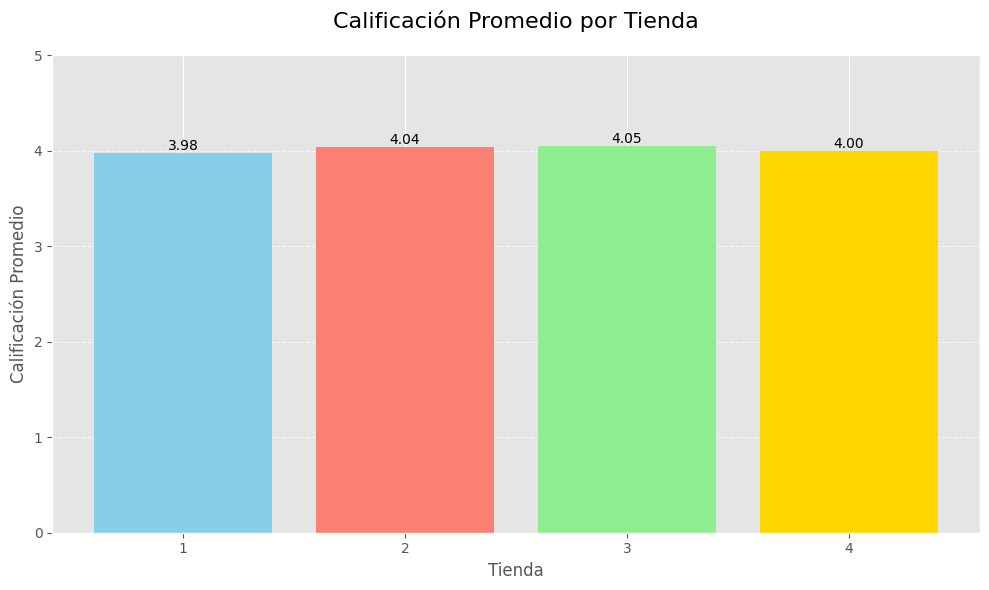

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
# Calcula la calificación promedio para cada tienda
calificacion_promedio_t1 = df_tienda1['Calificación'].mean()
calificacion_promedio_t2 = df_tienda2['Calificación'].mean()
calificacion_promedio_t3 = df_tienda3['Calificación'].mean()
calificacion_promedio_t4 = df_tienda4['Calificación'].mean()

# Diccionario para organizar la información de las calificaciones promedio
calificaciones_promedio_tiendas = {
    'Tienda': ['1', '2', '3', '4'],
    'Calificación Promedio': [calificacion_promedio_t1, calificacion_promedio_t2, calificacion_promedio_t3, calificacion_promedio_t4]
}

# Creación del DataFrame final para análisis
df_calificaciones_promedio = pd.DataFrame(calificaciones_promedio_tiendas)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
bars = plt.bar(df_calificaciones_promedio['Tienda'], df_calificaciones_promedio['Calificación Promedio'],
               color=['skyblue', 'salmon', 'lightgreen', 'gold'])

# Personalizar el gráfico
plt.title('Calificación Promedio por Tienda', fontsize=16, pad=20)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.ylim(0, 5) # Asegurar que el eje Y vaya de 0 a 5 (rango de calificación)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir los valores en cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

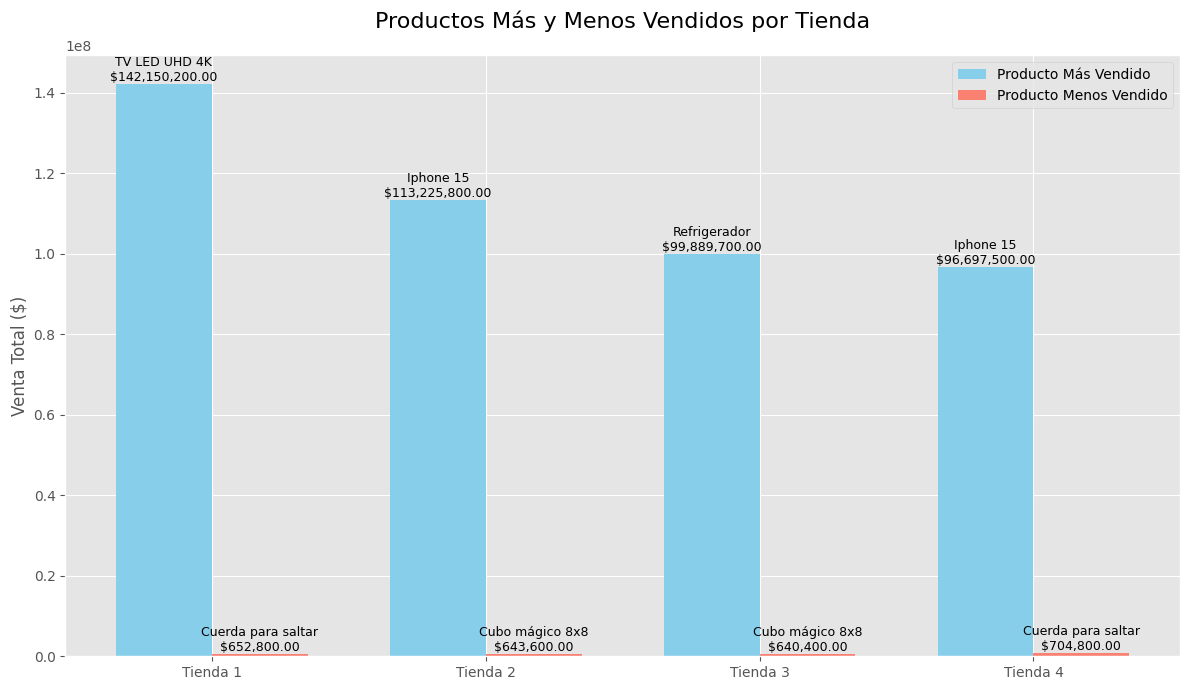

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
# Combina todos los dataframes en uno solo, agregando una columna para la tienda de origen
all_tiendas_con_tienda = pd.concat(
    [df_tienda1.assign(Tienda='Tienda 1'),
     df_tienda2.assign(Tienda='Tienda 2'),
     df_tienda3.assign(Tienda='Tienda 3'),
     df_tienda4.assign(Tienda='Tienda 4')],
    ignore_index=True
)

# Agrupa los datos por 'Tienda' y 'Nombre del Producto' y suma los precios (o cuenta la cantidad si hubiera una columna de cantidad)
# Aquí asumiremos que el "precio" representa una venta individual de ese producto.
ventas_por_tienda_producto = all_tiendas_con_tienda.groupby(['Tienda', 'Producto'])['Precio'].sum()

# Para cada tienda, encuentra el producto más y menos vendido
productos_extremas = {}
for tienda in ventas_por_tienda_producto.index.get_level_values('Tienda').unique():
    ventas_tienda = ventas_por_tienda_producto.loc[tienda]
    producto_mas_vendido = ventas_tienda.idxmax()
    venta_mas_vendida = ventas_tienda.max()
    producto_menos_vendido = ventas_tienda.idxmin()
    venta_menos_vendida = ventas_tienda.min()

    productos_extremas[tienda] = {
        'Más Vendido': {'Producto': producto_mas_vendido, 'Venta Total': venta_mas_vendida},
        'Menos Vendido': {'Producto': producto_menos_vendido, 'Venta Total': venta_menos_vendida}
    }

# Prepara los datos para el gráfico
tiendas_labels = []
productos_mas = []
ventas_mas = []
productos_menos = []
ventas_menos = []

for tienda, data in productos_extremas.items():
    tiendas_labels.append(tienda)
    productos_mas.append(data['Más Vendido']['Producto'])
    ventas_mas.append(data['Más Vendido']['Venta Total'])
    productos_menos.append(data['Menos Vendido']['Producto'])
    ventas_menos.append(data['Menos Vendido']['Venta Total'])

x = range(len(tiendas_labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))

rects1 = ax.bar([p - width/2 for p in x], ventas_mas, width, label='Producto Más Vendido', color='skyblue')
rects2 = ax.bar([p + width/2 for p in x], ventas_menos, width, label='Producto Menos Vendido', color='salmon')

# Añadir texto con el nombre del producto y la venta
def autolabel(rects, products):
    for rect, product in zip(rects, products):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                f'{product}\n${height:,.2f}',
                ha='center', va='bottom', fontsize=9)

autolabel(rects1, productos_mas)
autolabel(rects2, productos_menos)


# Personalizar el gráfico
ax.set_ylabel('Venta Total ($)', fontsize=12)
ax.set_title('Productos Más y Menos Vendidos por Tienda', fontsize=16, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(tiendas_labels)
ax.legend()

fig.tight_layout()
plt.show()

# 5. Envío promedio por tienda

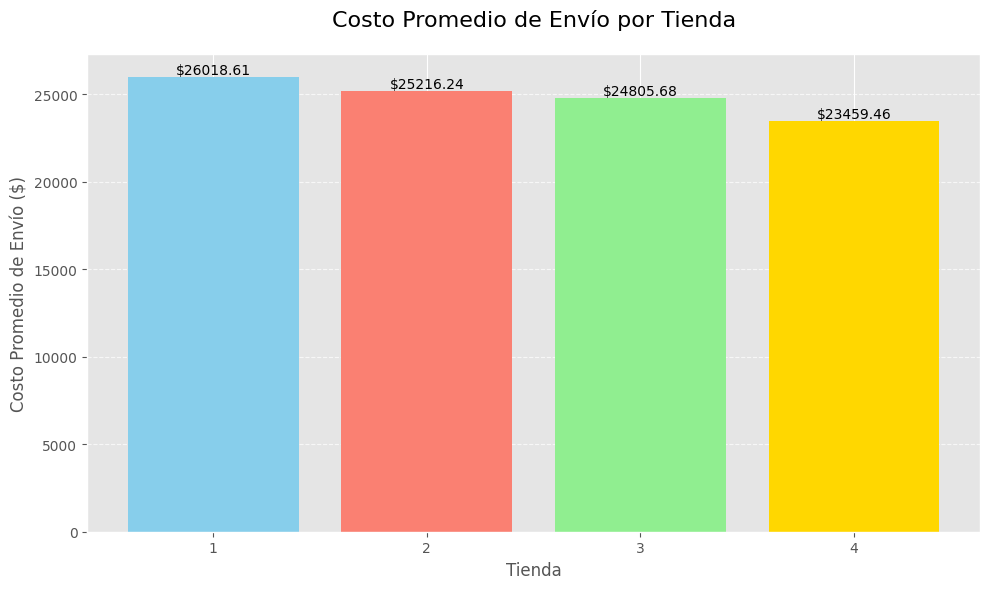

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
# Calcula el costo promedio de envío para cada tienda
costo_envio_promedio_t1 = df_tienda1['Costo de envío'].mean()
costo_envio_promedio_t2 = df_tienda2['Costo de envío'].mean()
costo_envio_promedio_t3 = df_tienda3['Costo de envío'].mean()
costo_envio_promedio_t4 = df_tienda4['Costo de envío'].mean()

# Diccionario para organizar la información de los costos de envío promedio
costos_envio_promedio_tiendas = {
    'Tienda': ['1', '2', '3', '4'],
    'Costo de Envío Promedio': [costo_envio_promedio_t1, costo_envio_promedio_t2, costo_envio_promedio_t3, costo_envio_promedio_t4]
}

# Creación del DataFrame final para análisis
df_costos_envio_promedio = pd.DataFrame(costos_envio_promedio_tiendas)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
bars = plt.bar(df_costos_envio_promedio['Tienda'], df_costos_envio_promedio['Costo de Envío Promedio'],
               color=['skyblue', 'salmon', 'lightgreen', 'gold'])

# Personalizar el gráfico
plt.title('Costo Promedio de Envío por Tienda', fontsize=16, pad=20)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo Promedio de Envío ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir los valores en cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}',
             ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()